In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import random

## Problem 1 (GalaxyZoo/Classify)

Galaxy classification is done by volunteers online via the online platform Zooniverse. 

## Problem 2 (Willett et al. 2013)

Willett et al. 2013: https://arxiv.org/abs/1308.3496 



-304,122 galaxies in GZ2

-'The goal was to in- clude only the nearest, brightest, and largest systems for which fine morphological features can be resolved and classified.' (cuts in section 2.1)

-$m_r$ > 17

-each image is 424 × 424 pixels scaled to (0.02×petroR90_r) arcsec per pixel, 42.4 arcseconds (http://skyserver.sdss.org/dr7/en/help/docs/algorithm.asp?key=mag_petro)

-decision tree is used, 'The GZ2 tree has 11 classification tasks with a total of 37 possible responses'

-GZ1 section 3.3 no debiasing and no decision tree

-section 2.4 (site history) 'For most of the duration of GZ2, images shown to classifiers were randomly selected from the database. To ensure that each galaxy ultimately had enough responses to accurately characterize the likelihood of the classification, images with low numbers of classifications were shown at a higher rate toward the end of the project'

-unreliable classifications -> section 3.2 individual user weighting 

-3.3 classification bias -> 'the presumed cause is that more distant galaxies, on average, are both smaller and dimmer in the cutout images. As a result, finer morphologi- cal features are more difficult to identify'



## Problem 3 (Conselice, 2014)


Conselice, 2014: https://arxiv.org/abs/1403.2783

-morphological classification infers galaxy evolution



## Problem 4 (Lotz et al., 2011,  Rodriguez-Gomez et al, 2015)

Rodriguez-Gomez et al, 2015: https://arxiv.org/abs/1502.01339

Lotz et al., 2011: https://arxiv.org/abs/1108.2508


-rodrigues-gomez "..it is important to quantify the galaxy-galaxy merger rate, namely, the frequency of galaxy mergers as a function of the masses of the objects involved, redshift, and possibly other parameters such as gas fractions. A precise determination of this quantity is of fundamental interest for understanding the growth and assembly of galaxies, for bringing galaxy formation models into agreement with the observed distribution of galaxy morphologies.."

## Problem 5 (opening training set and test set)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tarfile

file_train = tarfile.open('/content/drive/MyDrive/Lab3/training_images.tar.gz')
file_test = tarfile.open('/content/drive/MyDrive/Lab3/test_images.tar.gz')


In [5]:
'''file_train.extractall('/content/drive/MyDrive/Lab3/training_images')
file_test.extractall('/content/drive/MyDrive/Lab3/test_images')'''

file_train.extractall('/content/training_images')
file_test.extractall('/content/test_images')

In [6]:
file_test.close()
file_train.close()

In [7]:
class Labels:
    
    def __init__(self, filename):
        self.filename = filename
        self.df = pd.read_csv(self.filename)
        self.galaxyids = list(self.df['GalaxyID'])
    
    def get_df(self):
        #return pandas dataframe
        
        return self.df   
    
    
    def get_label_vector(self, galaxyid):
        #return label vector given galaxyID
        
        index = self.galaxyids.index(galaxyid)
        
        #normalize?? 
        #un_labels = np.array(self.df.iloc[index][1:])
        
        
             
        return np.array(self.df.iloc[index][1:])
    
    def get_galaxyids(self):
        
        return self.galaxyids

In [8]:
labels_train = Labels('/content/drive/MyDrive/Lab3/training_classifications.csv')

In [9]:
training_labels_df = labels_train.get_df()
training_labels_df

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

In [10]:
labels_train.get_label_vector(999950)

array([0.901216  , 0.098784  , 0.        , 0.        , 0.098784  ,
       0.        , 0.098784  , 0.        , 0.098784  , 0.        ,
       0.04537811, 0.05340589, 0.        , 0.127644  , 0.872356  ,
       0.40484065, 0.49637535, 0.        , 0.        , 0.        ,
       0.02132051, 0.        , 0.06209472, 0.04422877, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

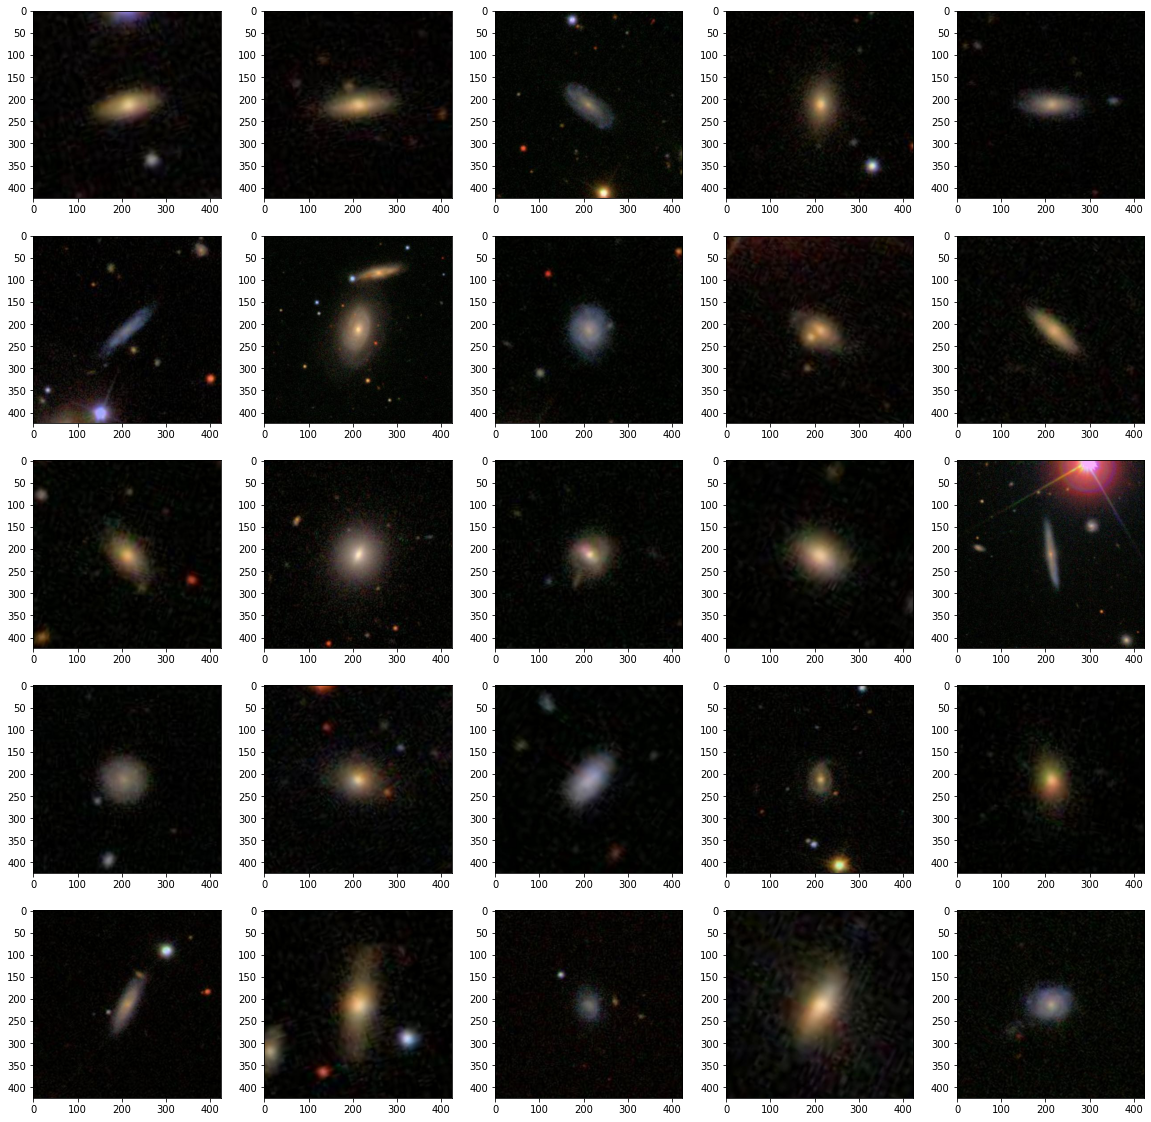

In [11]:
#plot 25 random images

fig, axs = plt.subplots(5, 5)
fig.set_size_inches(20, 20)

for i in range(5):
    for j in range(5):
        random_index = random.randint(0,len(training_labels_df)-1)
        galaxy_id = str(training_labels_df['GalaxyID'][random_index])

        file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'



        img = mpimg.imread(file_name)
        imgplot = axs[i, j].imshow(img)
        #axs[i,j].imshow(img)



## Problem 6 (histogram of labels)

buh
buh
buh


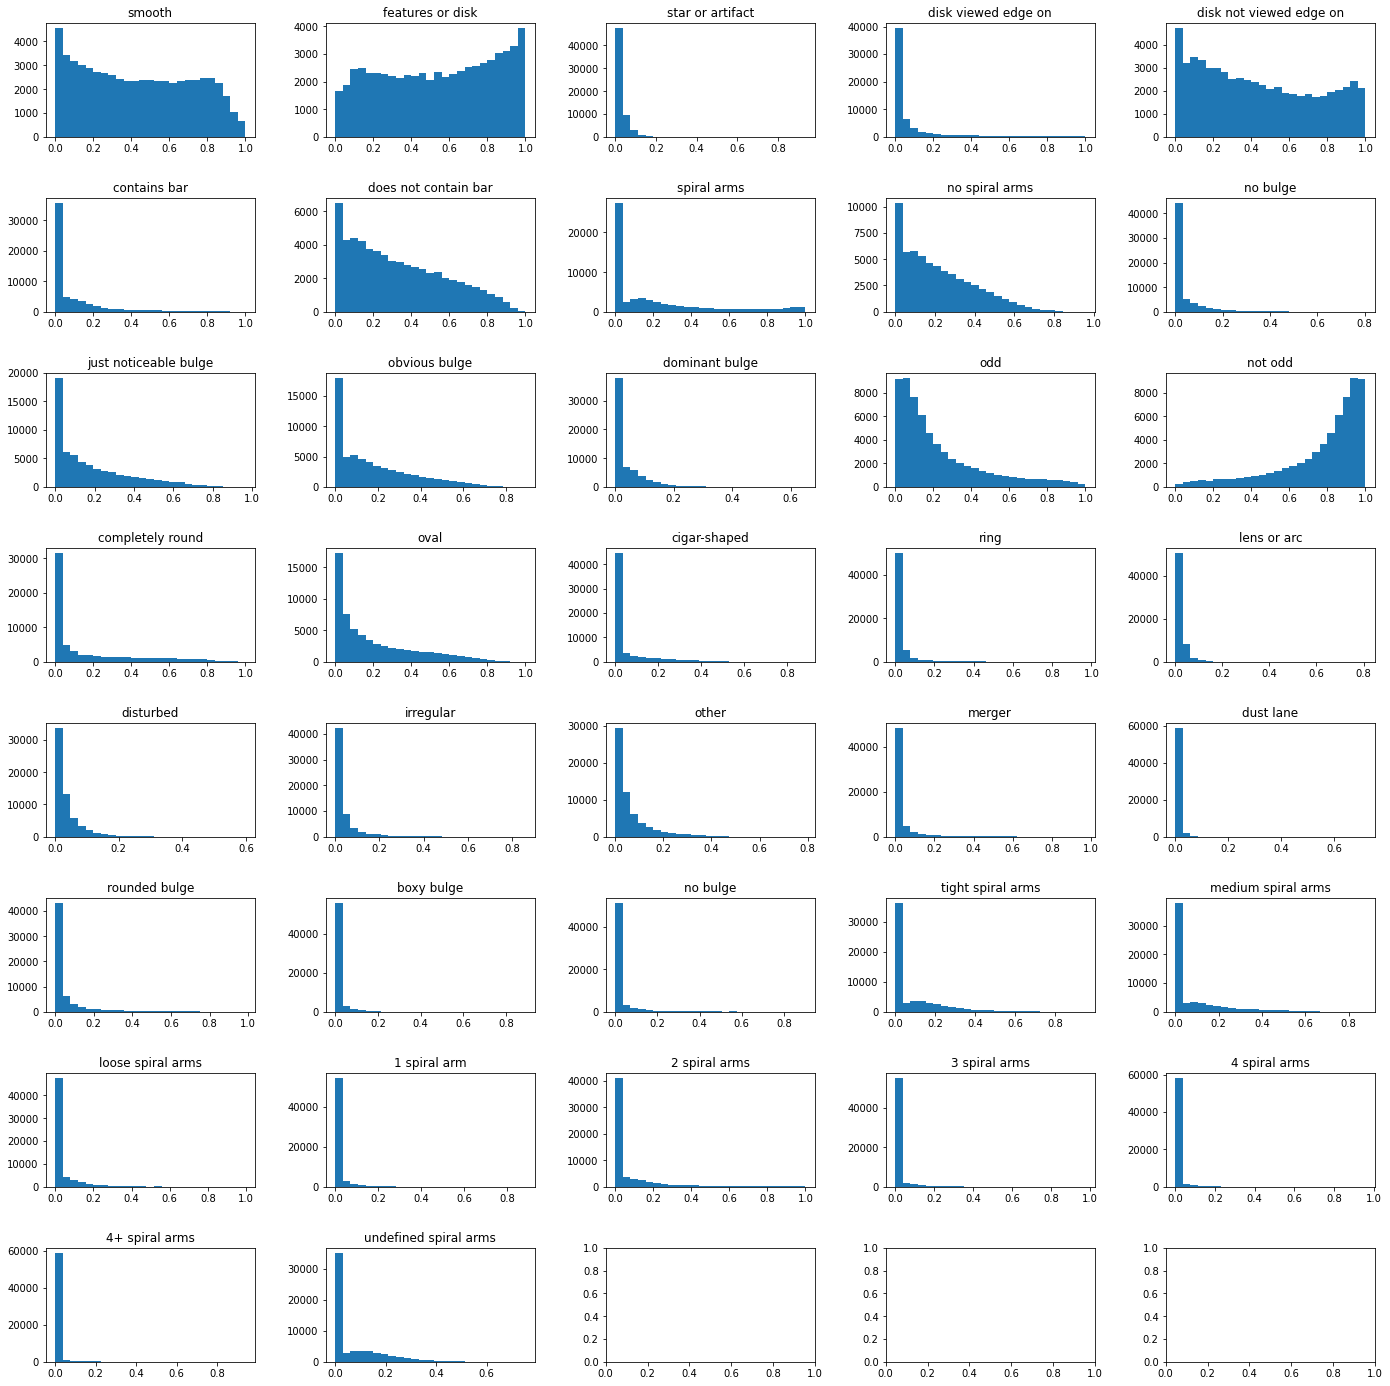

In [12]:
first_class = ['smooth', 'features or disk', 'star or artifact']
second_class = ['disk viewed edge on', 'disk not viewed edge on']
third_class = ['contains bar', 'does not contain bar']
fourth_class = ['spiral arms', 'no spiral arms']
fifth_class = ['no bulge', 'just noticeable bulge', 'obvious bulge', 'dominant bulge']
sixth_class = ['odd', 'not odd']
seventh_class = ['completely round', 'oval', 'cigar-shaped']
eighth_class = ['ring', 'lens or arc', 'disturbed', 'irregular', 'other', 'merger', 'dust lane']
ninth_class = ['rounded bulge', 'boxy bulge', 'no bulge']
tenth_class = ['tight spiral arms', 'medium spiral arms', 'loose spiral arms']
eleventh_class = ['1 spiral arm', '2 spiral arms', '3 spiral arms', '4 spiral arms', '4+ spiral arms', 'undefined spiral arms']

classes = first_class+second_class+third_class+fourth_class+fifth_class+sixth_class+seventh_class+eighth_class+ninth_class+tenth_class+eleventh_class

#implement axes subplots 

fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(training_labels_df[training_labels_df.columns[1:][k]], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')
        

## Problem 7 (prototype)

buh
buh
buh


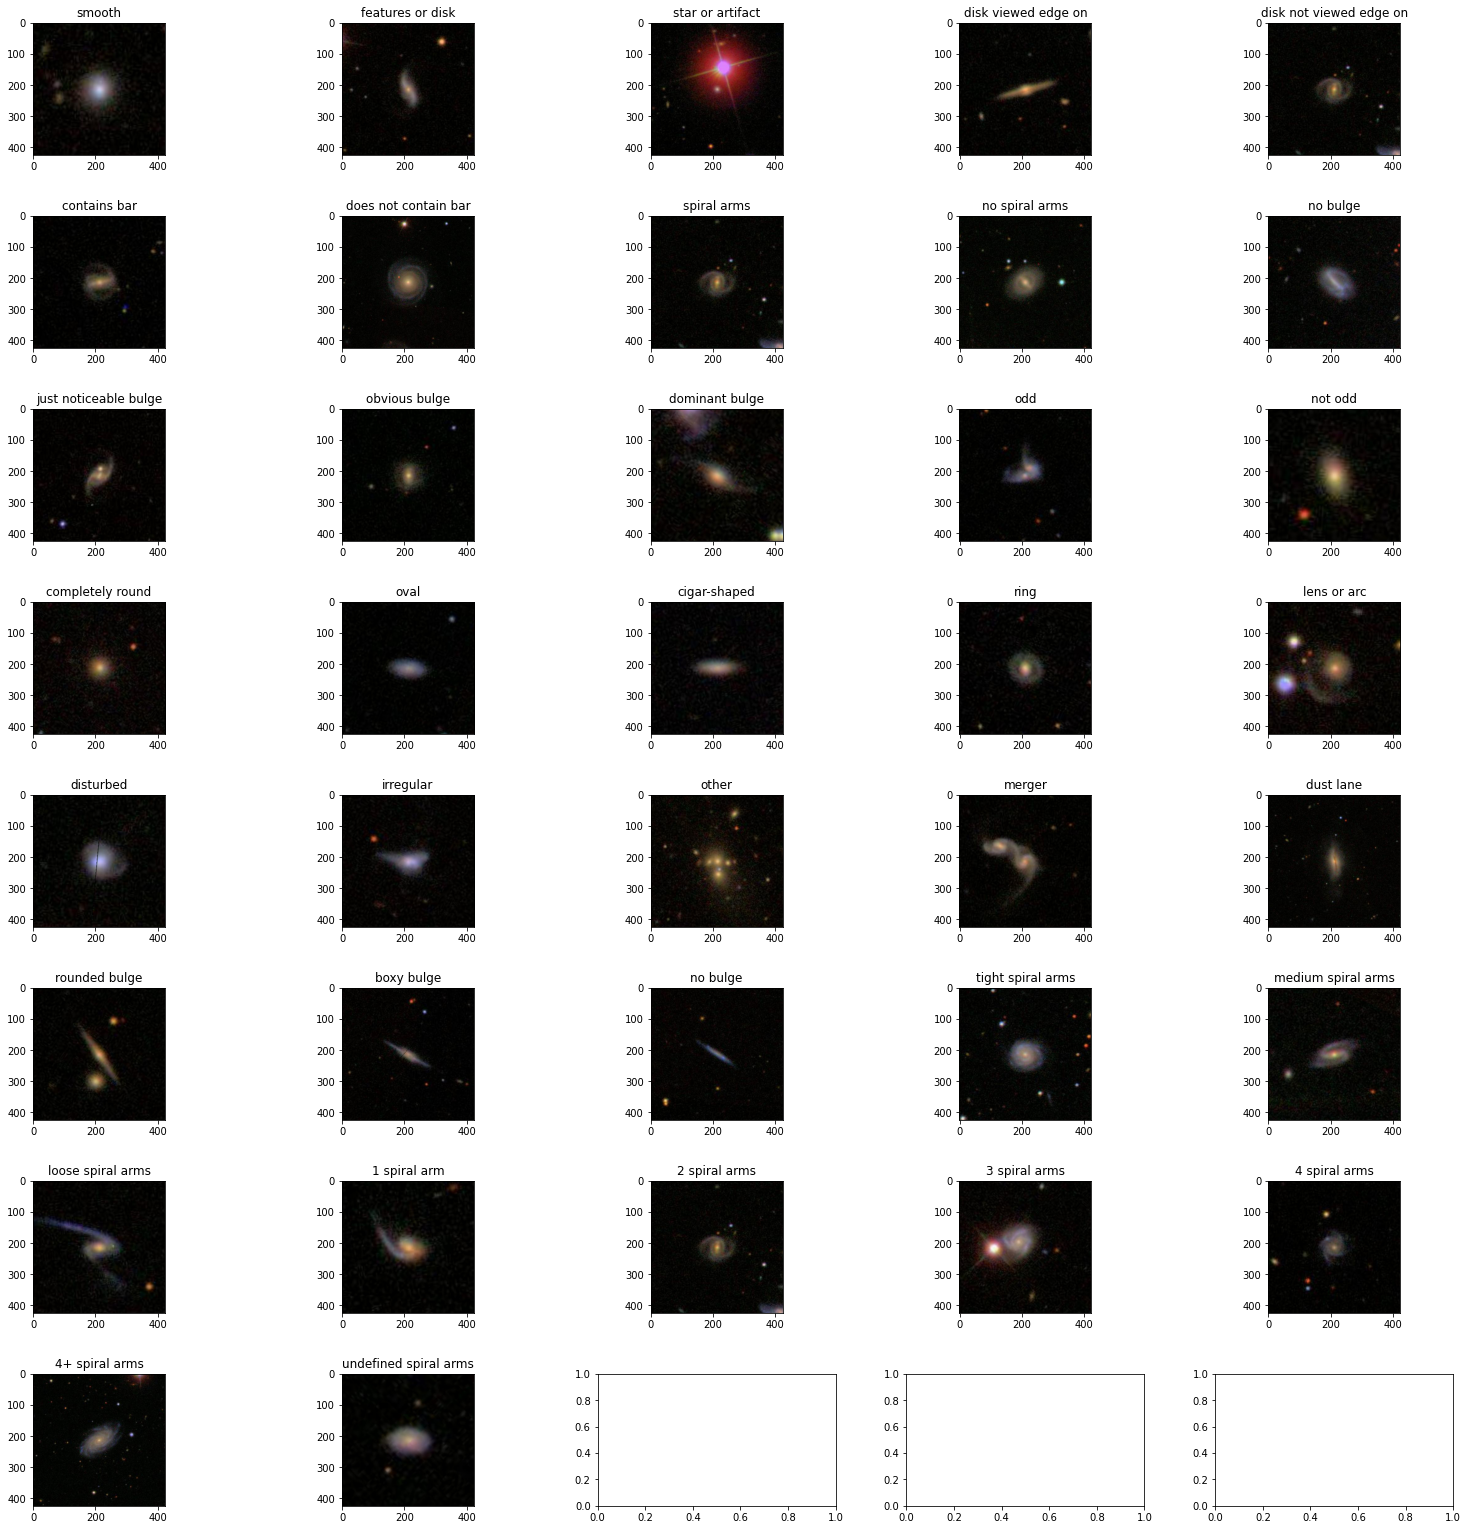

In [13]:
def plot_prototype(label, title):
    galaxy_id = str(training_labels_df['GalaxyID'][np.argmax(training_labels_df[label])])
    file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
    img = mpimg.imread(file_name)
    #imgplot = plt.imshow(img)
    #plt.title(title)
    #plt.show()
    
    return img
    

'''i = 0
for training_label in training_labels_df.columns[1:]:
    plot_prototype(training_label, classes[i])
    i += 1'''
    
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(22, 22)
fig.tight_layout(pad=4.0)

k = 0

for i in range(8):
    for j in range(5):
        try:
            axs[i,j].imshow(plot_prototype(training_labels_df.columns[1:][k], classes[k]))
            axs[i,j].set_title(classes[k])
            k += 1
        except:
            print('buh')


## Problem 8 (correlation matrix)

In [14]:
def correlation_matrix_element(class_i, class_j):
    i = np.array(training_labels_df[class_i])
    j = np.array(training_labels_df[class_j])
    
    num = np.mean(np.dot(i, j)) - np.mean(i)*np.mean(j)
    denom = np.sqrt(np.mean(np.dot(i,i)) - np.mean(i)**2) * np.sqrt(np.mean(np.dot(j,j)) - np.mean(j)**2)
    
    p_ij = num/denom
    
    return p_ij


correlation_matrix = []

for training_label_i in training_labels_df.columns[1:]:
    
    correlation_matrix_row = []
    
    for training_label_j in training_labels_df.columns[1:]:
        
        p_ij = correlation_matrix_element(training_label_i, training_label_j)
        correlation_matrix_row.append(p_ij)
        
    correlation_matrix.append(correlation_matrix_row)

correlation_matrix = np.array(correlation_matrix)

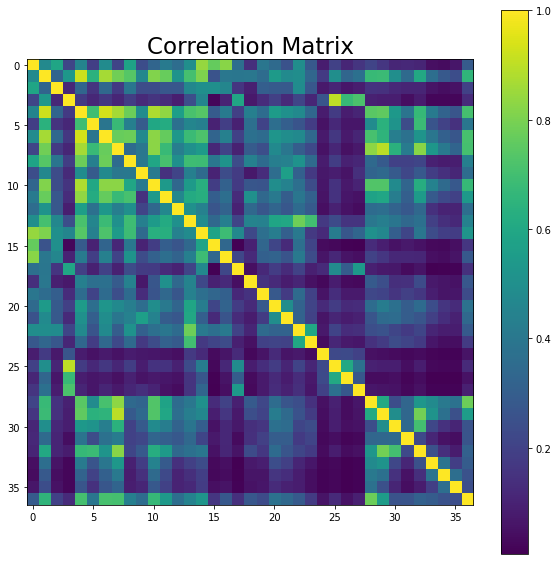

In [15]:
plt.figure(figsize = (10,10))
plt.title('Correlation Matrix', size = 23)
plt.imshow(correlation_matrix)
plt.colorbar()

## Problem 9 (correlation sub-matrices)

Text(0.5, 1.0, 'Class 11')

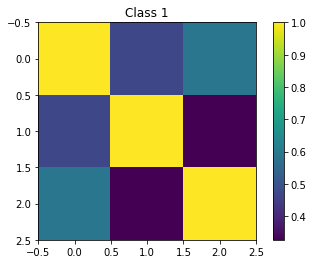

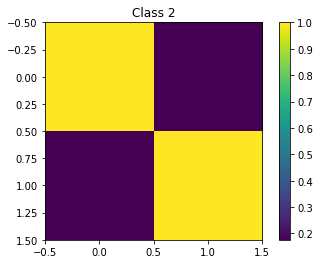

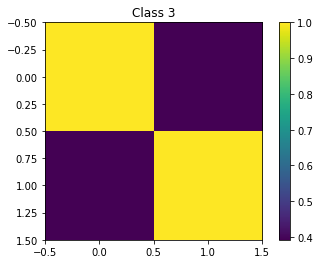

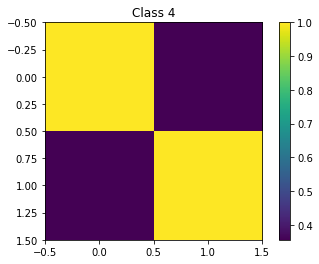

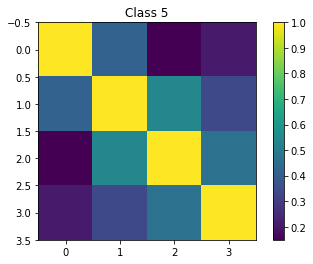

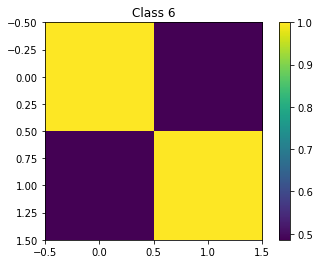

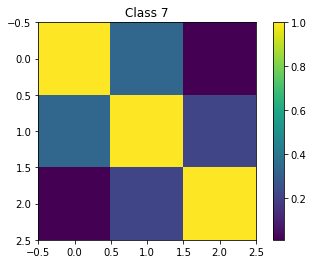

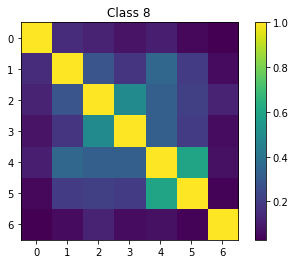

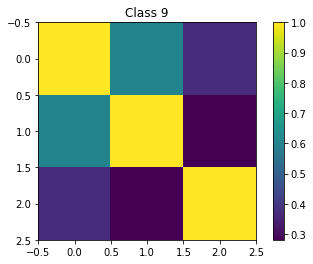

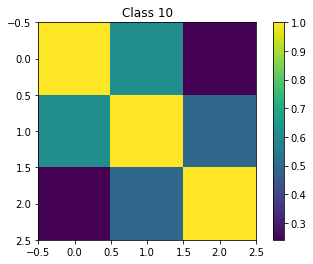

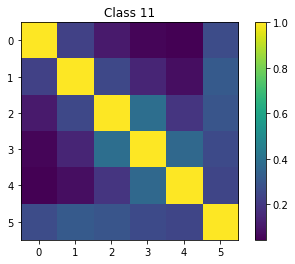

In [16]:
#class 1 
plt.figure()
plt.imshow(correlation_matrix[0:3,0:3])
plt.colorbar()
plt.title('Class 1')

#class 2 
plt.figure()
plt.imshow(correlation_matrix[3:5,3:5])
plt.colorbar()
plt.title('Class 2')

#class 3 
plt.figure()
plt.imshow(correlation_matrix[5:7,5:7])
plt.colorbar()
plt.title('Class 3')

#class 4 
plt.figure()
plt.imshow(correlation_matrix[7:9,7:9])
plt.colorbar()
plt.title('Class 4')

#class 5 
plt.figure()
plt.imshow(correlation_matrix[9:13,9:13])
plt.colorbar()
plt.title('Class 5')

#class 6 
plt.figure()
plt.imshow(correlation_matrix[13:15,13:15])
plt.colorbar()
plt.title('Class 6')

#class 7 
plt.figure()
plt.imshow(correlation_matrix[15:18,15:18])
plt.colorbar()
plt.title('Class 7')

#class 8 
plt.figure()
plt.imshow(correlation_matrix[18:25,18:25])
plt.colorbar()
plt.title('Class 8')

#class 9 
plt.figure()
plt.imshow(correlation_matrix[25:28,25:28])
plt.colorbar()
plt.title('Class 9')

#class 10 
plt.figure()
plt.imshow(correlation_matrix[28:31,28:31])
plt.colorbar()
plt.title('Class 10')

#class 11
plt.figure()
plt.imshow(correlation_matrix[31:37,31:37])
plt.colorbar()
plt.title('Class 11')

## Problem 10 (minimum memory to load image into memory)

single image: 539464 bytes
total: 33.219114192 GB
total: 0.862584624 GB


(424, 424, 3)

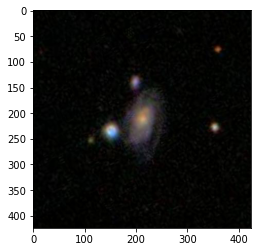

In [17]:
import sys

random_index = random.randint(0,len(training_labels_df)-1)
galaxy_id = str(training_labels_df['GalaxyID'][random_index])
file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
img = mpimg.imread(file_name)

plt.imshow(img)

print('single image:', sys.getsizeof(np.array(img)), 'bytes')

#calculate total memory

print('total:', len(training_labels_df)*sys.getsizeof(np.array(img)) / 1e6 *0.001, 'GB')
print('total:', len(training_labels_df)*14008 / 1e6 *0.001, 'GB')

np.shape(img)

## Problem 11 (downsizing images)

539464 uint8 (424, 424, 3)
14008 uint8 (68, 68, 3)


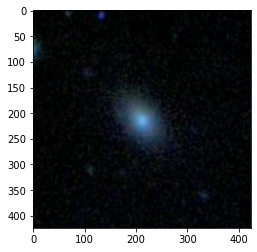

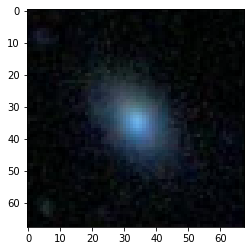

In [18]:
import cv2 

#testing downsizing procedure

galaxy_id = str(training_labels_df['GalaxyID'][np.argmax(training_labels_df['Class4.2'])])

random_index = random.randint(0,len(training_labels_df)-1)
galaxy_id = str(training_labels_df['GalaxyID'][random_index])

#random_index = random.randint(0,len(training_labels_df)-1)
#galaxy_id = str(training_labels_df['GalaxyID'][random_index])
file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'

img1 = np.array(cv2.imread(file_name))
img1_d = np.array(cv2.imread(file_name)[90:334, 90:334])
img1_d = np.array(cv2.resize(img1_d, (0, 0), fx = 0.28, fy = 0.28))

plt.figure()
plt.imshow(img1)
print(sys.getsizeof(img1), img1.dtype, np.shape(img1))

plt.figure()
plt.imshow(img1_d)
print(sys.getsizeof(img1_d), img1_d.dtype, np.shape(img1_d))


def downsize_image(galaxy_id):
    file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
    img1_d = np.array(cv2.imread(file_name)[90:334, 90:334])
    img1_d = np.array(cv2.resize(img1_d, (0, 0), fx = 0.28, fy = 0.28))
    
    return img1_d

## Problem 12+13 (generator function) (train/test split)

In [19]:
from sklearn.utils import shuffle
import os
import math

galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 0)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids)*0.8):]


batch_size = 1

#testing generator functions

def generator_batches_train_1():
    
    n1 = 0
    n2 = batch_size
    
    while len(galaxyids_train[n1:n2]) != 0:
        
        img1_d_list = []
        label_vectors = []
        
        for i in galaxyids_train[n1:n2]:          
            img1_d_list.append(downsize_image(str(i)))
            label_vectors.append(labels_train.get_label_vector(i))
                  
        
        yield np.array(img1_d_list), np.array(label_vectors)
        
        n1+=batch_size
        n2+=batch_size
        
def generator_batches_test_1():
    n1 = 0
    n2 = batch_size
    
    while len(galaxyids_test[n1:n2]) != 0:
        
        img1_d_list = []
        label_vectors = []
        
        for i in galaxyids_test[n1:n2]:          
            img1_d_list.append(downsize_image(str(i)))
            label_vectors.append(labels_train.get_label_vector(i))
                  
        
        yield np.array(img1_d_list), np.array(label_vectors)
        
        n1+=batch_size
        n2+=batch_size


        
#save downsized_images

def generator_save_training():
           
    for i in galaxyids_train:          
        img1_d = downsize_image(str(i))
            
        np.save(os.path.join('downsized_train', f'{i}'), img1_d)
                  
        yield img1_d

def generator_save_test():
    
    for i in galaxyids_test:
        imd1_d = downsize_image(str(i))
        
        np.save(os.path.join('downsized_test', f'{i}'), img1_d)

        yield img1_d
        
'''mygenerator_save_training = generator_save_training()
mygenerator_save_test = generator_save_test()

for i in mygenerator_save_training:    
    img1_d = i

for i in mygenerator_save_test:
    img1_d = i'''

'mygenerator_save_training = generator_save_training()\nmygenerator_save_test = generator_save_test()\n\nfor i in mygenerator_save_training:    \n    img1_d = i\n\nfor i in mygenerator_save_test:\n    img1_d = i'

In [20]:
#histogram of training labels

label_matrix_train = []

for galaxyid_train in galaxyids_train:   
    label_matrix_train.append(labels_train.get_label_vector(galaxyid_train))

label_matrix_train = np.array(label_matrix_train)

buh
buh
buh


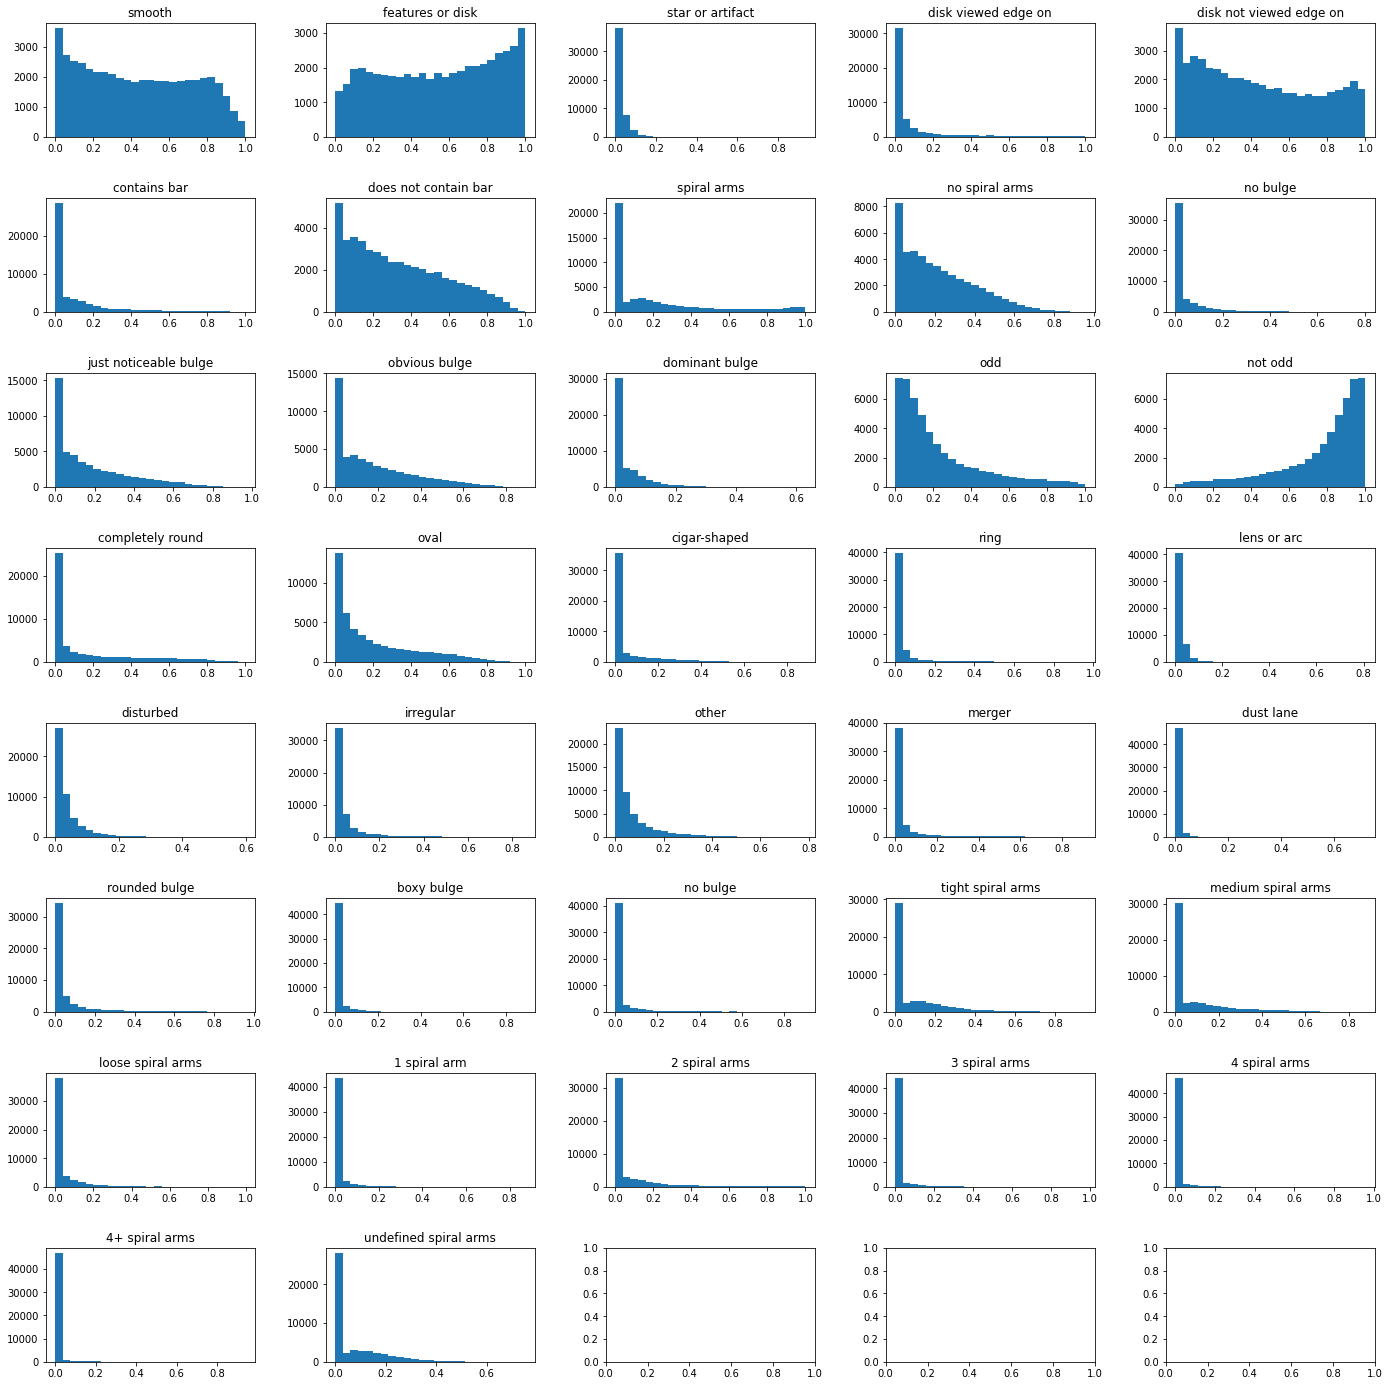

In [21]:
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(label_matrix_train[:,k], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')

In [22]:
#histogram of test labels

label_matrix_test = []

for galaxyid_test in galaxyids_test:   
    label_matrix_test.append(labels_train.get_label_vector(galaxyid_test))

label_matrix_test = np.array(label_matrix_test)

buh
buh
buh


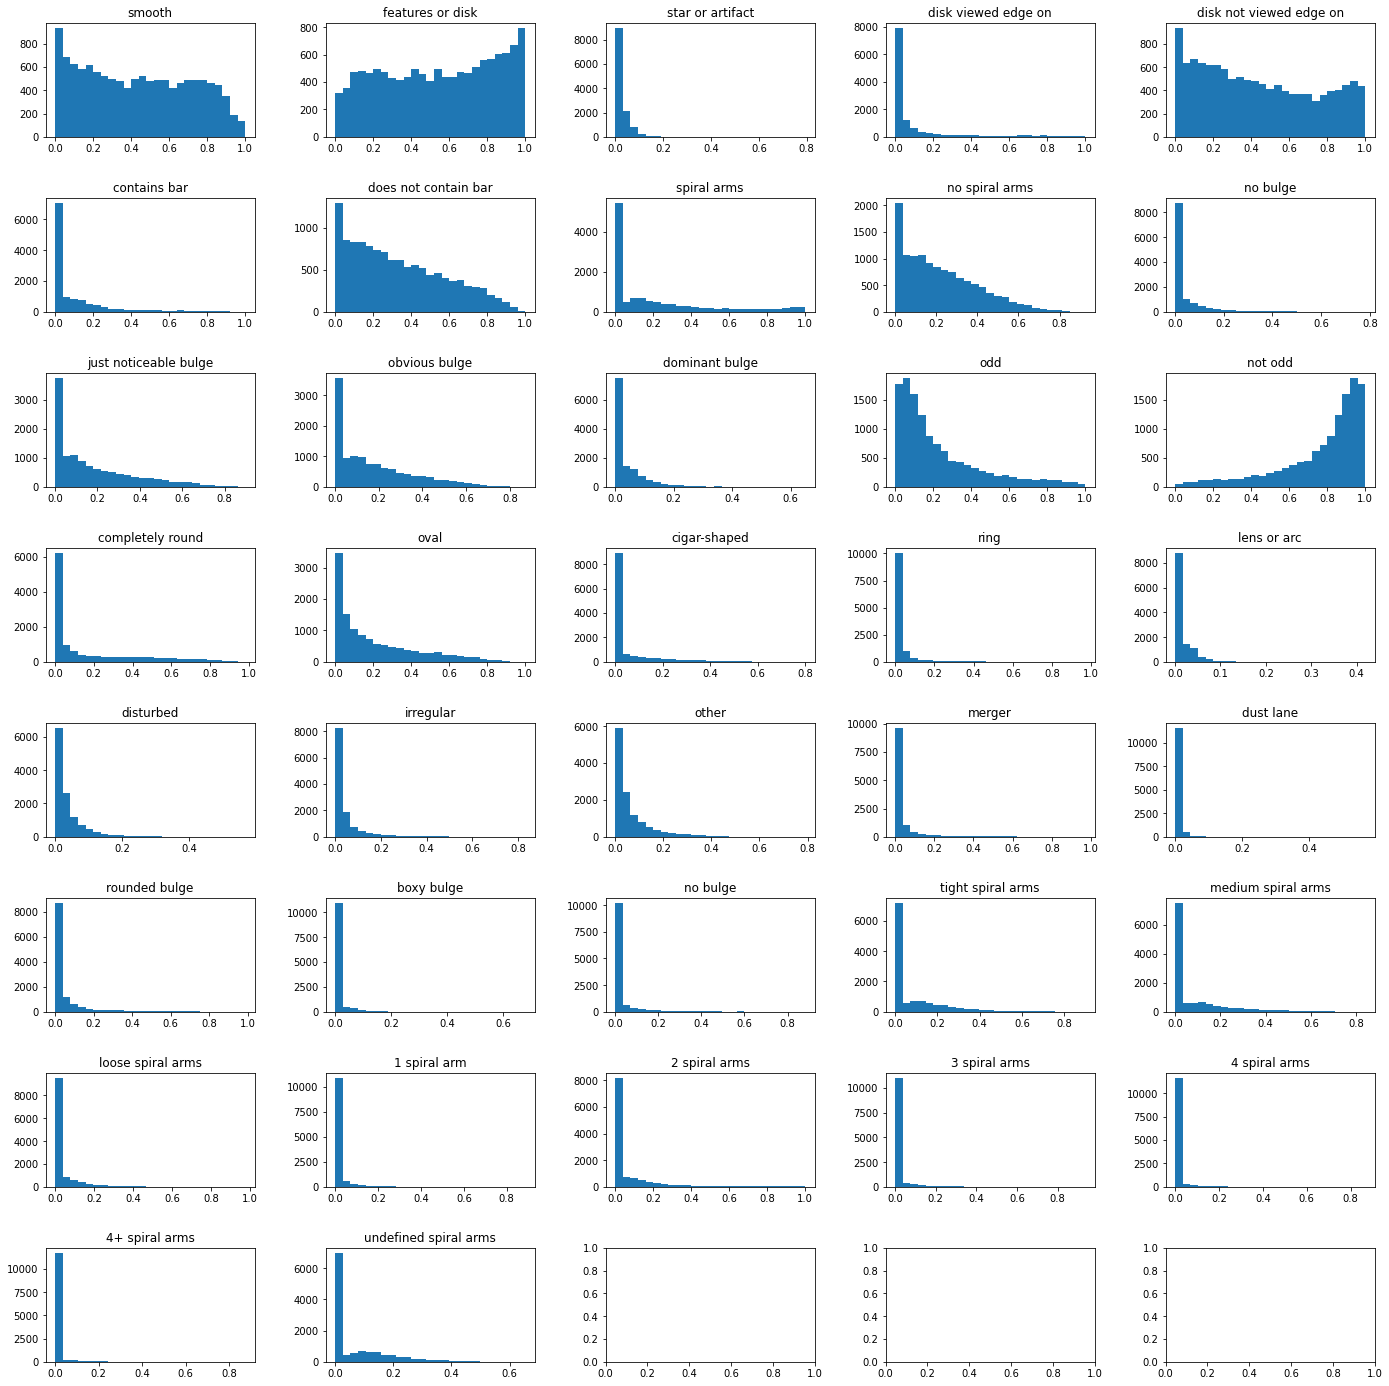

In [23]:
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(label_matrix_test[:,k], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')

## Problem 14 (Crude Guess Model)

In [24]:
#guess is the mean in training set

guess_label = []
for i in range(37):
    mean_i = np.mean(label_matrix_train[:,i])
    
    guess_label.append(mean_i)

In [25]:
#root mean squared error 

#training set
Lmrse = 0 

Ngalaxies = len(label_matrix_train[:,0])
Nlabels = len(label_matrix_train[0,:])

for i in range(Ngalaxies):
    
    for j in range(Nlabels):
        
        Lmrse += (label_matrix_train[i,j] - guess_label[j])**2

Lmrse = np.sqrt(1 / (Ngalaxies*Nlabels) * Lmrse)

print('Lmrse for training set:', Lmrse)

#test set
Lmrse = 0 

Ngalaxies = len(label_matrix_test[:,0])
Nlabels = len(label_matrix_test[0,:])

for i in range(Ngalaxies):
    
    for j in range(Nlabels):
        
        Lmrse += (label_matrix_test[i,j] - guess_label[j])**2

Lmrse = np.sqrt(1 / (Ngalaxies*Nlabels) * Lmrse)

print('Lmrse for test set:', Lmrse)

Lmrse for training set: 0.1638732869846417
Lmrse for test set: 0.1637779392573367


## Problem 15 (implementing CNN)

In [26]:
import datetime, os
from tensorflow.keras import backend as K
import keras

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Activation, BatchNormalization
)

from keras.callbacks import CSVLogger

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
mygenerator = generator_batches_train_1()

galaxy_imgs, label_vectors = next(mygenerator)

input_shape = np.shape(galaxy_imgs[0])
output_shape = np.shape(label_vectors[0])

In [28]:
#build model

with tf.device('/gpu:0'):

    model = Sequential() 

    model.add(Conv2D(32, (3,3), input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(128, (6,6)))
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.1))

    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(rate=0.15))
    
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(rate=0.15))

    model.add(Dense(output_shape[0]))
    model.add(Activation('sigmoid'))
 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 66, 66, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 66, 66, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        1

In [29]:
#shuffle data and split
galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 32)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids_shuffle)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids_shuffle)*0.8):]

def generator_batches_train(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
       
        n1 = 0
        n2 = batch_size

        while len(galaxyids_train[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_train[n1:n2]:          
                img1_d_list.append(downsize_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size
        
def generator_batches_test(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
        
        n1 = 0
        n2 = batch_size

        while len(galaxyids_test[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_test[n1:n2]:          
                img1_d_list.append(downsize_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size

In [30]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

In [31]:
num_epochs = 100
batch_size = 128
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size)
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 200


#instantiate generators
mygenerator_train = generator_batches_train(num_epochs, batch_size)
mygenerator_test = generator_batches_test(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=6, min_lr=1e-13, verbose=1, cooldown=0)
#csv logger callback
csv_logger = CSVLogger('/content/drive/MyDrive/Lab3/log.csv', append=True, separator=';')


'''for i in mygenerator_train:
    galaxy_imgs, label_vectors = i
    model.fit(x = galaxy_imgs.reshape(-1, 79, 79, 3), y = label_vectors, 
                epochs = 10, batch_size = 10, callbacks = [csv_logger, reduce_lr])'''

#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'/content/drive/MyDrive/Lab3/nn_results/nn_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=20, \
                                             verbose=1, mode='auto')


In [32]:
#FIT MODEL
'''model.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

'model.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,\n          validation_data = (mygenerator_test), validation_steps = validation_steps,\n          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'

In [33]:
#load model for retrain 

model = keras.models.load_model('/content/drive/MyDrive/Lab3/nn_results/nn_2022-12-06T06:01.h5')

#view logs

df = pd.read_csv('/content/drive/MyDrive/Lab3/log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))
df

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.512344  0.036102      0.605310  0.020909
1       1  0.576812  0.021200      0.624878  0.018343
2       2  0.600078  0.018905      0.637707  0.016782
3       3  0.630013  0.017763      0.663771  0.015709
4       4  0.655352  0.016442      0.700146  0.014940
5       5  0.676491  0.015450      0.706967  0.014228
6       6  0.688555  0.014659      0.723612  0.013020
7       7  0.700258  0.014148      0.734898  0.012746
8       8  0.710703  0.013575      0.732137  0.012248
9       9  0.717966  0.013302      0.739282  0.012258
10     10  0.717148  0.012987      0.731082  0.011858
11     11  0.722617  0.012761      0.738714  0.011689
12     12  0.728672  0.012417      0.745128  0.011782
13     13  0.729849  0.012323      0.748863  0.011726
14     14  0.735898  0.011987      0.740257  0.011837
15     15  0.739583  0.011904      0.753573  0.011301
16     16  0.742969  0.011631      0.746427  0.011708
17     17  0.747049  0.011578      0.751462  0.011273
18     18  0.749062  0.011336      0.746184  0.011716
19     19  0.745563  0.011313      0.748538  0.011410
20     20  0.750195  0.011043      0.756496  0.011176
21     21  0.751779  0.011123      0.753248  0.011261
22     22  0.753320  0.010798      0.759256  0.011143
23     23  0.754202  0.010881      0.745047  0.011460
24     24  0.759141  0.010567      0.742124  0.011686
25     25  0.753069  0.010621      0.753167  0.011120
26     26  0.760339  0.010436      0.756902  0.011219
27     27  0.756758  0.010478      0.752842  0.011147
28     28  0.762450  0.010204      0.747321  0.011433
29     29  0.762070  0.010068      0.760880  0.010677
30     30  0.769682  0.009715      0.764372  0.010824
31     31  0.768203  0.009717      0.759256  0.011058
32      0  0.754570  0.010192      0.751380  0.011177
33      1  0.765030  0.009922      0.752598  0.011163
34      2  0.761641  0.009975      0.761286  0.011028
35      3  0.766125  0.009871      0.759500  0.010984
36      4  0.768203  0.009851      0.744803  0.011689
37      5  0.768079  0.009756      0.761854  0.011385
38      6  0.765898  0.009722      0.756090  0.011240
39      7  0.772692  0.009593      0.747889  0.011698
40      8  0.765430  0.009600      0.762585  0.010975
41      9  0.769447  0.009478      0.745291  0.011534
42     10  0.765977  0.009454      0.750974  0.011200
43     11  0.769955  0.009337      0.741312  0.011445
44     12  0.769297  0.009300      0.760961  0.010992
45     13  0.772848  0.009227      0.754222  0.010828
46     14  0.772109  0.009152      0.763722  0.010947
47     15  0.772184  0.009144      0.751462  0.011741
48     16  0.774336  0.009099      0.752761  0.011540
49     17  0.777422  0.009067      0.747077  0.011646
50     18  0.777539  0.008903      0.759825  0.010965
51     19  0.778477  0.009002      0.742936  0.011468
52     20  0.775391  0.008867      0.754385  0.011219
53     21  0.780236  0.008738      0.762423  0.010937
54     22  0.784219  0.008388      0.762179  0.010866
55     23  0.784223  0.008477      0.748944  0.011270
56     24  0.790087  0.008252      0.765346  0.010780
57     25  0.784102  0.008426      0.757551  0.010857
58     26  0.791807  0.008114      0.767701  0.010635
59     27  0.783789  0.008276      0.757551  0.010963

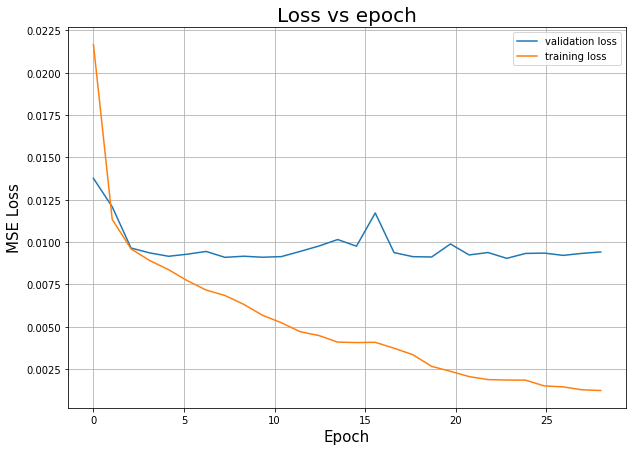

In [70]:
plt.figure(figsize = (10,7))
plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch', size = 20)
plt.xlabel("Epoch", size = 15)
plt.ylabel("MSE Loss", size = 15)
plt.grid()
plt.legend()

The CNN consists of 3 convolutional layers with 32, 64, and 128 kernels respectively. The first convolutional layer goes through a batch normalization which normalizes the outputs from -1 to 1 before being passed into a relu activation function, which keeps only positive neurons to turn on. The first 2 convolution layers end with a pooling layer which downsamples the output. Following the convolutional layers are fully connected layers with an output of 102, 88, 64 respectively. After each layer is a dropout function which turns off neurons randomly at a specified percentage, which help fights overfitting.

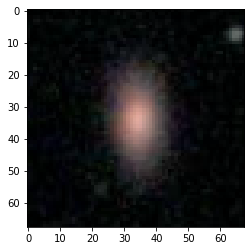

1/1 [==============================] - 7s 7s/step
smooth: 0.73327005
features or disk: 0.23067026
star or artifact: 0.028499966
disk viewed edge on: 0.01983121
disk not viewed edge on: 0.16949967
contains bar: 0.013247888
does not contain bar: 0.14505829
spiral arms: 0.024976488
no spiral arms: 0.13616158
no bulge: 0.08579702
just noticeable bulge: 0.036240917
obvious bulge: 0.01539846
dominant bulge: 0.015226598
odd: 0.1691296
not odd: 0.8308504
completely round: 0.012263153
oval: 0.6470815
cigar-shaped: 0.054304056
ring: 0.00018703206
lens or arc: 0.0030918047
disturbed: 0.024861522
irregular: 0.04786488
other: 0.053884666
merger: 0.0042172316
dust lane: 7.185766e-05
rounded bulge: 0.00711289
boxy bulge: 0.0005917557
no bulge: 0.0023683368
tight spiral arms: 0.00894354
medium spiral arms: 0.00517971
loose spiral arms: 0.0035998004
1 spiral arm: 0.001426929
2 spiral arms: 0.0026772437
3 spiral arms: 2.320679e-05
4 spiral arms: 4.005744e-06
4+ spiral arms: 6.8526824e-05
undefined spira

In [35]:
#PREDICT

#plot random test data
random_index = random.randint(0,len(galaxyids_test)-1)
galaxy_id = str(galaxyids_test[random_index])

img = downsize_image(galaxy_id)
plt.imshow(img)
plt.show()

#predict

labels = model.predict(img.reshape(-1, 68, 68, 3))

for i in range(len(labels[0])):
    print(classes[i] + ':', labels[0][i])
    


## Problem 16  (model summary)

In [36]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 66, 66, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 66, 66, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_32 (Activation)  (None, 66, 66, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 33, 33, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 33, 33, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 31, 31, 64)      

In [37]:
print('trainable params:', '1,963,749')
print('pixels in image:', 68*68)

trainable params: 1,963,749
pixels in image: 4624


## Problem 17 (ResNets)

A ResNet (residual neural network) is a certain nn architecture that utilizes shortcut connections, in which an input can "skip" layers of a network. For every few layers of the network, the output function is the mapping of the layers with an addition of the intial input of the layers. This allows for an identity mapping + a fit for residuals/perturbations of the identity.  

## Problem 18, 19 (Implementing ResNet) + (Reducelr)

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [39]:
input_t = tf.keras.Input(shape = input_shape)
res_model = ResNet50(include_top = False, weights = 'imagenet', input_tensor = input_t)

with tf.device('/gpu:0'):
    
    resnet_model_1 = Sequential()
    resnet_model_1.add(res_model)
    resnet_model_1.add(Flatten())

    resnet_model_1.add(Dense(output_shape[0]))
    resnet_model_1.add(Activation('sigmoid'))

resnet_model_1.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 37)                682021    
                                                                 
 activation_4 (Activation)   (None, 37)                0         
                                                                 
Total params: 24,269,733
Trainable params: 24,216,613
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet_model_1.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

In [41]:
num_epochs = 100
batch_size = 128
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size) 
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 200


#instantiate generators
mygenerator_train = generator_batches_train(num_epochs, batch_size)
mygenerator_test = generator_batches_test(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=6, min_lr=1e-13, verbose=1, cooldown=0)
#csv logger callback
csv_logger = CSVLogger('/content/drive/MyDrive/Lab3/resnet1_log.csv', append=False, separator=';')


#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'/content/drive/MyDrive/Lab3/nn_results/resnet1_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=18, \
                                             verbose=1, mode='auto')

In [42]:
#FIT RESNET MODEL
'''resnet_model_1.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

'resnet_model_1.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,\n          validation_data = (mygenerator_test), validation_steps = validation_steps,\n          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'

In [43]:
#load model for retrain 

resnet_model_1 = keras.models.load_model('/content/drive/MyDrive/Lab3/nn_results/resnet1_2022-12-07T04:10.h5')



    epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.613125  0.021661      0.720283  0.013765
1       1  0.710617  0.011345      0.692270  0.012083
2       2  0.737461  0.009602      0.750487  0.009651
3       3  0.759909  0.008910      0.760393  0.009363
4       4  0.762695  0.008373      0.765671  0.009165
5       5  0.774255  0.007721      0.755846  0.009288
6       6  0.776602  0.007172      0.705992  0.009450
7       7  0.789540  0.006850      0.754628  0.009102
8       8  0.790547  0.006327      0.743748  0.009168
9       9  0.803299  0.005683      0.771517  0.009108
10     10  0.806328  0.005242      0.746103  0.009145
11     11  0.813502  0.004714      0.746752  0.009451
12     12  0.816523  0.004485      0.751218  0.009769
13     13  0.819717  0.004098      0.751867  0.010153
14     14  0.822578  0.004072      0.754385  0.009759
15     15  0.821711  0.004086      0.699903  0.011720
16     16  0.829063  0.003739      0.759743  0.009382
17     17  0.837307  0.00335

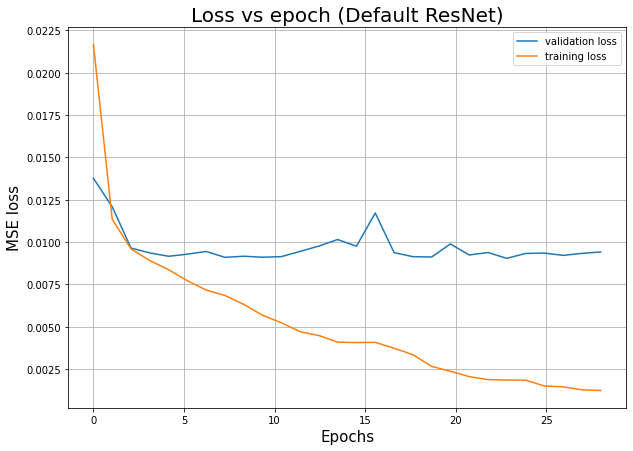

In [69]:
#view logs

df = pd.read_csv('/content/drive/MyDrive/Lab3/resnet1_log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))
print(df)
#plot losses

plt.figure(figsize = (10,7))
plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch (Default ResNet)', size = 20)
plt.grid()
plt.xlabel('Epochs', size = 15)
plt.ylabel('MSE loss', size = 15)
plt.legend()


## Problem 20 + 21 (Data augmentation + reweighting)

In [45]:
! pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import imutils

galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 32)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids_shuffle)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids_shuffle)*0.8):]


def downsize_rotate_image(galaxy_id):
    file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
    
    random_theta = np.random.uniform(low = 0.0, high = 360.0, size = None)
    
    img1_d = np.array(cv2.imread(file_name))
    
    rotated_image = imutils.rotate(img1_d, angle=random_theta)

    rotated_image = rotated_image[90:334, 90:334]
    rotated_image = np.array(cv2.resize(rotated_image, (0, 0), fx = 0.28, fy = 0.28))
    
    return rotated_image


def generator_batches_train_rotate(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
       
        n1 = 0
        n2 = batch_size

        while len(galaxyids_train[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_train[n1:n2]:          
                img1_d_list.append(downsize_rotate_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size
        
def generator_batches_test_rotate(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
        
        n1 = 0
        n2 = batch_size

        while len(galaxyids_test[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_test[n1:n2]:          
                img1_d_list.append(downsize_rotate_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size

14008


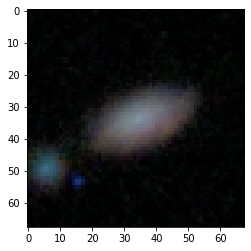

In [47]:
#test rotation 
galaxy_id = '999948'

img = downsize_rotate_image(galaxy_id)

print(sys.getsizeof(img))

plt.imshow(img)
plt.show()

In [48]:
from keras.utils.generic_utils import get_custom_objects

input_t = tf.keras.Input(shape = input_shape)

res_model = ResNet50(include_top = False, weights = 'imagenet', input_tensor = input_t)

#reweighting function

epsilon = 1e-12

def custom_activation(outputs):
    
    question_slices = [slice(0, 3), slice(3, 5), slice(5, 7), slice(7, 9), slice(9, 13), slice(13, 15),
                                slice(15, 18), slice(18, 25), slice(25, 28), slice(28, 31), slice(31, 37)]
    
    normalisation_mask = np.zeros((37, 37), dtype='float32')
    for s in question_slices:
        normalisation_mask[s, s] = 1.0
        
    normalisation_denoms = tf.matmul(outputs, tf.convert_to_tensor(normalisation_mask)) + epsilon 
    output_normalised = outputs / normalisation_denoms
    
    '''# First element is a slice indicating the values to be scaled. Second element is an index indicating the scale factor.
    scaling_sequence = [
        (slice(3, 5), 1), #  rescale Q2 (edge on disk or not) by Class1.2 (features or disk)  
        (slice(5, 13), 4), # rescale Q3, Q4, Q5 (bar, spiral arms, bulge questions) by Class2.2 (not edge on disk)
        (slice(15, 18), 0),# rescale Q7 (how round?) by Class1.1 (is it smooth?)
        (slice(18, 25), 13),#rescale Q8 (how is it odd) by Class6.1 (is it odd?)
        (slice(25, 28), 3),# rescale Q9 (bulge?) by Class2.1 (edge-on-disk?)
        (slice(28, 37), 7),# rescale Q10, Q11 (spiral? how many arms) by Class4.1. (is there a spiral?)
    ]'''
    
    one = tf.divide(output_normalised[:,1],output_normalised[:,1])
    
    c1 = output_normalised[:,1]
    c4 = output_normalised[:,4]
    c0 = output_normalised[:,0]
    c13 = output_normalised[:,13]
    c3 = output_normalised[:,3]
    c7 = output_normalised[:,7]
    
    reweight_tensor = tf.stack([one, one, one, c1, c1, c4, c4, c4, c4, c4, c4, c4, c4, one, one, c0, c0, c0, 
                                c13, c13, c13, c13, c13, c13, c13, c3, c3, c3, 
                               c7, c7, c7, c7, c7, c7, c7, c7, c7], axis = 1)
    
    return tf.math.multiply(output_normalised, reweight_tensor)


get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    

with tf.device('/gpu:0'):
    
    resnet_model_2 = Sequential()
    resnet_model_2.add(res_model)
    resnet_model_2.add(Flatten())
    
    resnet_model_2.add(Dense(200, activation = 'relu'))
    resnet_model_2.add(Dropout(rate=0.1))
    resnet_model_2.add(Dense(100, activation = 'relu'))
    resnet_model_2.add(Dropout(rate=0.1))
    resnet_model_2.add(Dense(output_shape[0]))
    resnet_model_2.add(Activation('sigmoid'))
    
    

    #add reweighting 
    
    resnet_model_2.add(Activation(custom_activation, name='Reweight'))

    
print(resnet_model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 200)               3686600   
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 37)               

In [49]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet_model_2.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])


#testing custom activation
'''random_index = random.randint(0,len(galaxyids_test)-1)
galaxy_id = str(galaxyids_test[random_index])

img = downsize_image(galaxy_id)


labels = resnet_model_2.predict(img.reshape(-1, 68, 68, 3))

for i in range(len(labels[0])):
    print(classes[i] + ':', labels[0][i])'''
    


"random_index = random.randint(0,len(galaxyids_test)-1)\ngalaxy_id = str(galaxyids_test[random_index])\n\nimg = downsize_image(galaxy_id)\n\n\nlabels = resnet_model_2.predict(img.reshape(-1, 68, 68, 3))\n\nfor i in range(len(labels[0])):\n    print(classes[i] + ':', labels[0][i])"

In [50]:
num_epochs = 100
batch_size = 128
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size)
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 200

#instantiate generators
mygenerator_train = generator_batches_train_rotate(num_epochs, batch_size)
mygenerator_test = generator_batches_test_rotate(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.4,
                              patience=4, min_lr=1e-13, verbose=1, cooldown=0)

#csv logger callback
csv_logger = CSVLogger('/content/drive/MyDrive/Lab3/resnet2_log.csv', append=True, separator=';')


#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'/content/drive/MyDrive/Lab3/nn_results/resnet2_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=15, \
                                             verbose=1, mode='auto')

In [51]:
#FIT RESNET MODEL
'''resnet_model_2.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

'resnet_model_2.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,\n          validation_data = (mygenerator_test), validation_steps = validation_steps,\n          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'

In [52]:
#load model for retrain 

resnet_model_2 = keras.models.load_model('/content/drive/MyDrive/Lab3/nn_results/resnet2_2022-12-06T02:35.h5')

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.686797  0.020156      0.746427  0.015769
1       1  0.743062  0.015519      0.771111  0.013741
2       2  0.752109  0.014185      0.778094  0.012737
3       3  0.763036  0.013350      0.780286  0.012176
4       4  0.766484  0.012789      0.782478  0.012227
5       5  0.776483  0.012459      0.785563  0.012469
6       6  0.776211  0.012131      0.796525  0.011352
7       7  0.786061  0.011869      0.795063  0.011454
8       8  0.783984  0.011673      0.797256  0.011242
9       9  0.789930  0.011512      0.790760  0.011529
10     10  0.787539  0.011392      0.796444  0.011021
11     11  0.793058  0.011201      0.800341  0.010833
12     12  0.791562  0.011137      0.806106  0.010980
13     13  0.801657  0.010983      0.801884  0.010809
14     14  0.796250  0.010896      0.808055  0.010932
15     15  0.802087  0.010785      0.803426  0.010932
16     16  0.800352  0.010700      0.801640  0.010832
17     17  0.805136  0.010600      0.805294  0.010614
18     18  0.802500  0.010515      0.803183  0.010719
19     19  0.808655  0.010198      0.811546  0.010217
20     20  0.810313  0.009898      0.811059  0.010161
21     21  0.812485  0.009942      0.810896  0.010258
22     22  0.814453  0.009796      0.817798  0.010126
23     23  0.814401  0.009807      0.810978  0.010245
24     24  0.819102  0.009683      0.810166  0.010126
25     25  0.812915  0.009692      0.813982  0.010115
26     26  0.820069  0.009570      0.812926  0.010211
27     27  0.819648  0.009411      0.817148  0.009983
28     28  0.823391  0.009227      0.813332  0.010042
29     29  0.820820  0.009292      0.813819  0.009977
30     30  0.826323  0.009156      0.811465  0.010047
31     31  0.825117  0.009159      0.814388  0.009899
32     32  0.825346  0.008988      0.814144  0.009965
33     33  0.825156  0.009065      0.812926  0.009948
34     34  0.826440  0.008935      0.813657  0.009967
35     35  0.824805  0.008993      0.818529  0.009910
36     36  0.829059  0.008903      0.814307  0.009914
37     37  0.824883  0.008921      0.815687  0.009899

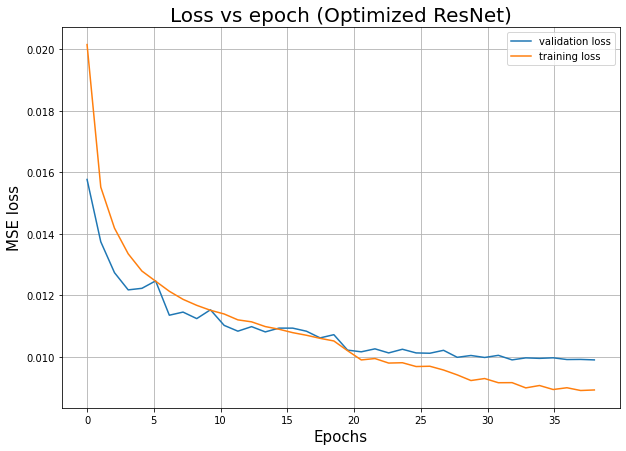

In [68]:
#view logs

df = pd.read_csv('/content/drive/MyDrive/Lab3/resnet2_log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))

#plot losses

plt.figure(figsize = (10,7))
plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch (Optimized ResNet)', size = 20)
plt.grid()
plt.xlabel('Epochs', size = 15)
plt.ylabel('MSE loss', size = 15)
plt.legend()
df

## Problem 22 (Comparison of Validation Losses)

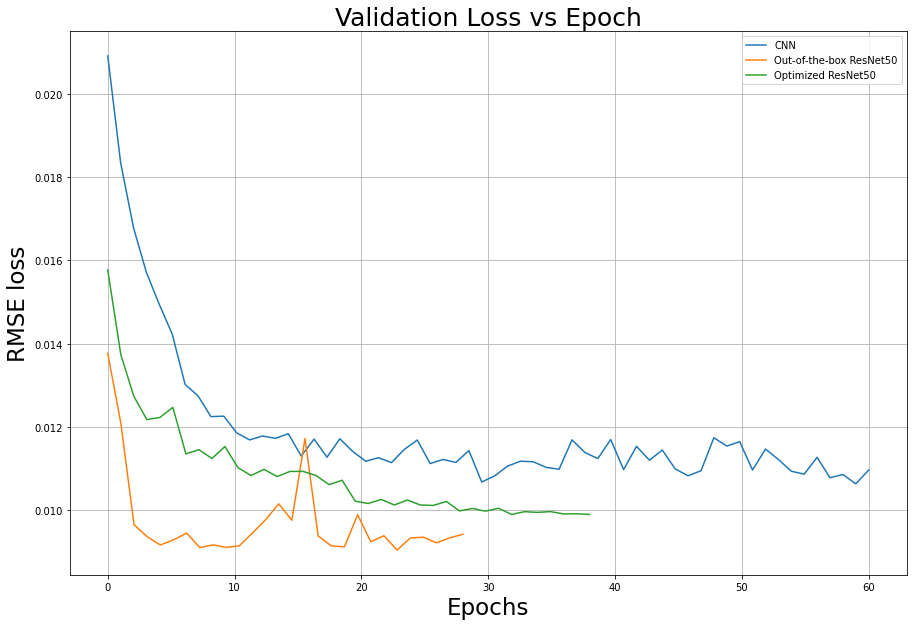

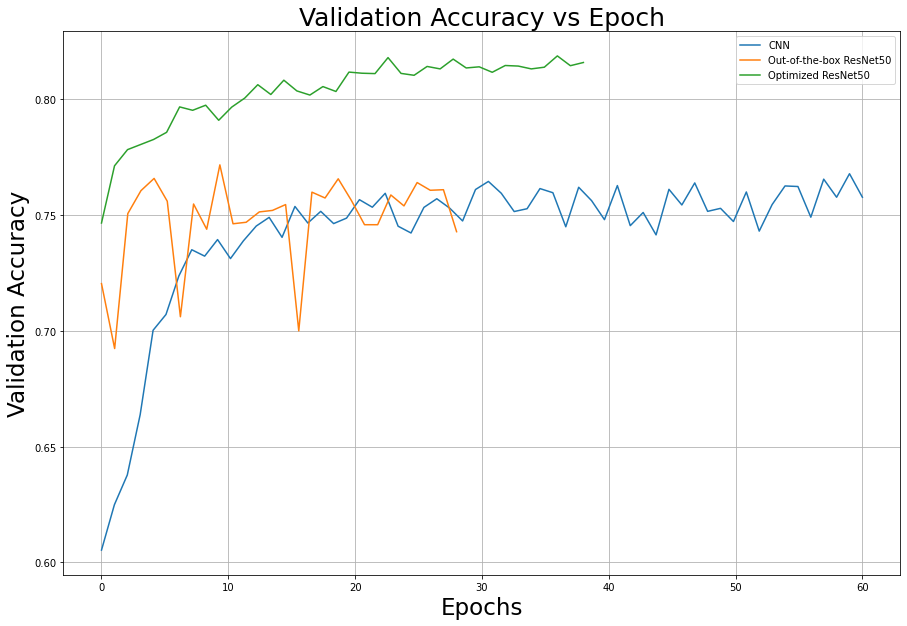

In [54]:
df_nn = pd.read_csv('/content/drive/MyDrive/Lab3/log.csv', sep = ';')
df_rn1 = pd.read_csv('/content/drive/MyDrive/Lab3/resnet1_log.csv', sep = ';')
df_rn2 = pd.read_csv('/content/drive/MyDrive/Lab3/resnet2_log.csv', sep = ';')

val_losses_nn = df_nn['val_loss']
epochs_nn = np.linspace(0, len(df_nn['epoch']), len(df_nn['epoch']))
val_acc_nn = df_nn['val_accuracy']

val_losses_rn1 = df_rn1['val_loss']
epochs_rn1 = np.linspace(0, len(df_rn1['epoch']), len(df_rn1['epoch']))
val_acc_rn1 = df_rn1['val_accuracy']

val_losses_rn2 = df_rn2['val_loss']
epochs_rn2 = np.linspace(0, len(df_rn2['epoch']), len(df_rn2['epoch']))
val_acc_rn2 = df_rn2['val_accuracy']

plt.figure(figsize = (15,10))
plt.plot(epochs_nn, val_losses_nn, label = 'CNN')
plt.plot(epochs_rn1, val_losses_rn1, label = 'Out-of-the-box ResNet50')
plt.plot(epochs_rn2, val_losses_rn2, label = 'Optimized ResNet50')
plt.title('Validation Loss vs Epoch', size = 25)
plt.grid()
plt.xlabel('Epochs', size = 23)
plt.ylabel('RMSE loss', size = 23)
plt.legend()

plt.figure(figsize = (15,10))
plt.plot(epochs_nn, val_acc_nn, label = 'CNN')
plt.plot(epochs_rn1, val_acc_rn1, label = 'Out-of-the-box ResNet50')
plt.plot(epochs_rn2, val_acc_rn2, label = 'Optimized ResNet50')
plt.title('Validation Accuracy vs Epoch', size = 25)
plt.grid()
plt.xlabel('Epochs', size = 23)
plt.ylabel('Validation Accuracy', size = 23)
plt.legend()








## Problem 23 (True vs Predicted in Validation Set with ResNet50)

In [55]:
validation_imgs = []
for i in range(len(galaxyids_test)):
  t = str(galaxyids_test[i])

  img = downsize_image(t)
  
  validation_imgs.append(img)
  

predicted_labels = resnet_model_1.predict(np.array(validation_imgs))

print(np.shape(predicted_labels))

385/385 [==============================] - 8s 18ms/step
(12316, 37)


In [56]:
true_labels = []
for i in range(len(galaxyids_test)):

  label_vec = labels_train.get_label_vector(galaxyids_test[i])

  true_labels.append(label_vec)


print(np.shape(true_labels))

print(np.shape(validation_imgs))

(12316, 37)
(12316, 68, 68, 3)


buh
buh
buh


'plt.figure()\nplt.scatter(predicted_labels, true_labels)'

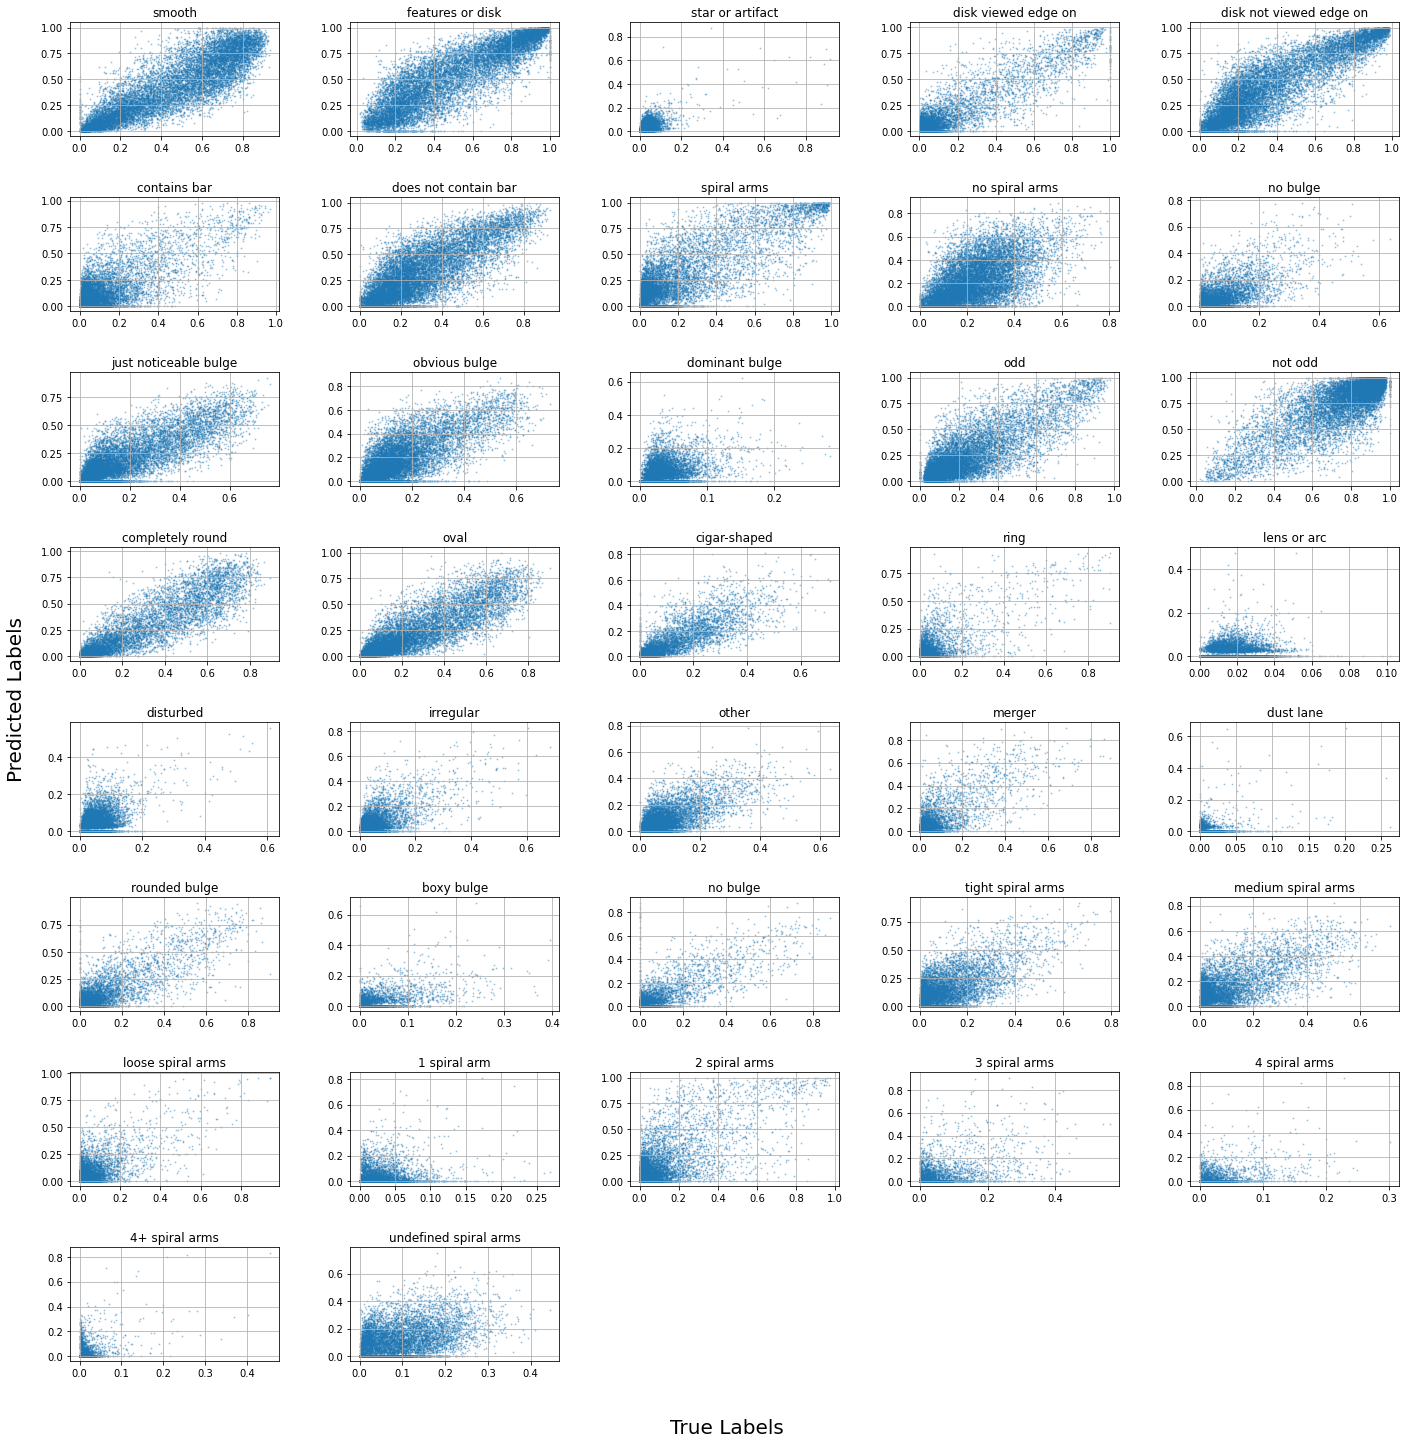

In [72]:
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)


k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].scatter(predicted_labels[:,k], true_labels[:,k], s=1,alpha = 0.3)
            axs[i,j].grid()
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')

fig.text(0.5, -0.01, 'True Labels', ha='center', fontsize = 20)
fig.text(0.00, 0.5, 'Predicted Labels', va='center', rotation='vertical', fontsize = 20)

axs[7,2].remove()
axs[7,3].remove()
axs[7,4].remove()

'''plt.figure()
plt.scatter(predicted_labels, true_labels)'''

## Problem 24 (Predicted Label of Highest probability)

buh


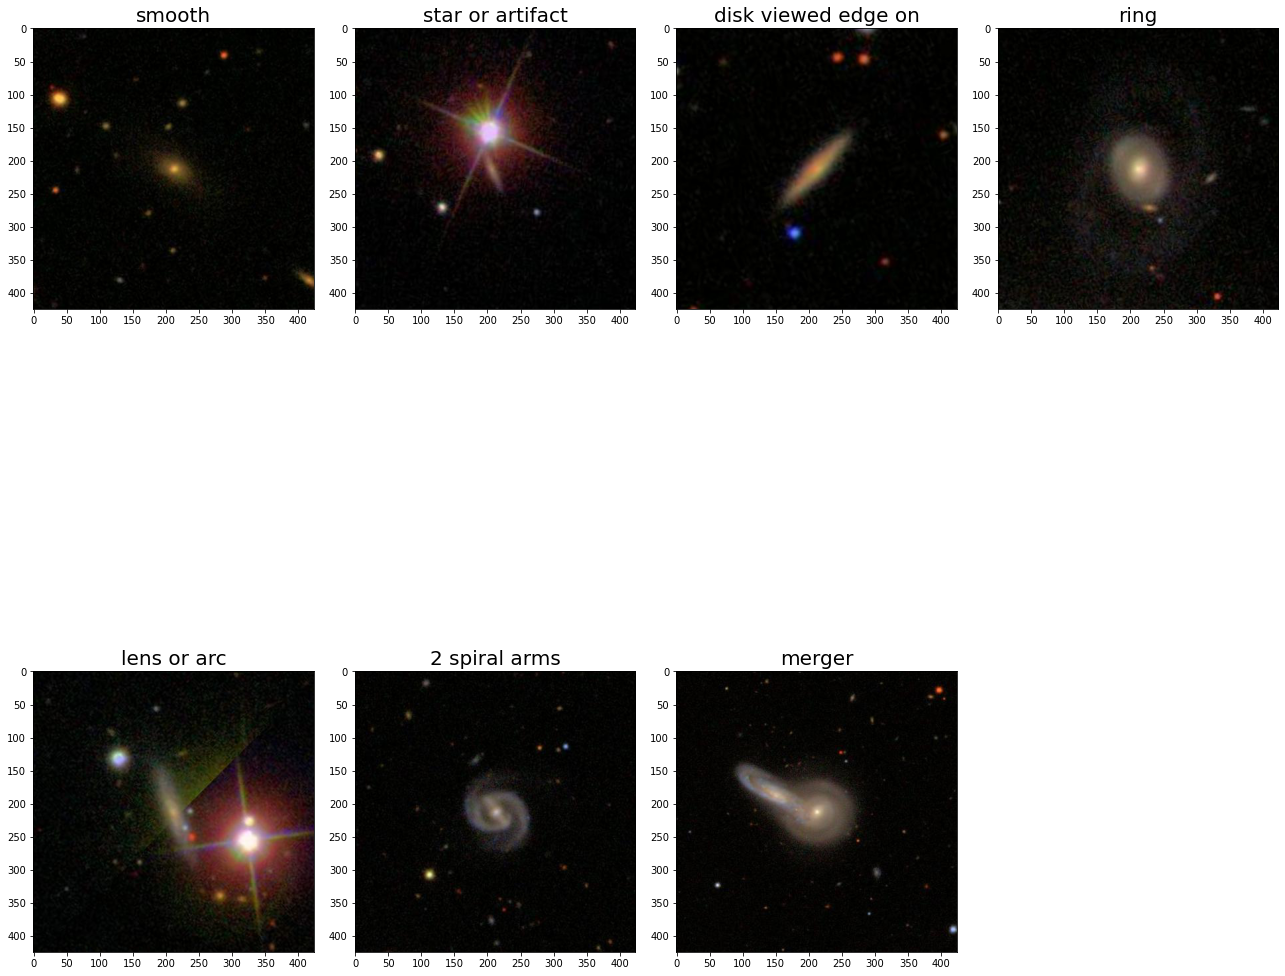

In [58]:
#max predicted 

label_interests = [0,2,3,18,19,32,23]

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 18)
fig.tight_layout(pad=1.0)

k=0
for i in range(2):
    for j in range(4):
        try:

          index = np.argmax(predicted_labels[:,label_interests[k]])
          galaxy_id = str(galaxyids_test[index])
          file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
          img = mpimg.imread(file_name)
          axs[i,j].imshow(img)
          axs[i,j].set_title(classes[label_interests[k]], size = 20)

          k += 1
        except:
            print('buh')

axs[1,3].remove()



buh


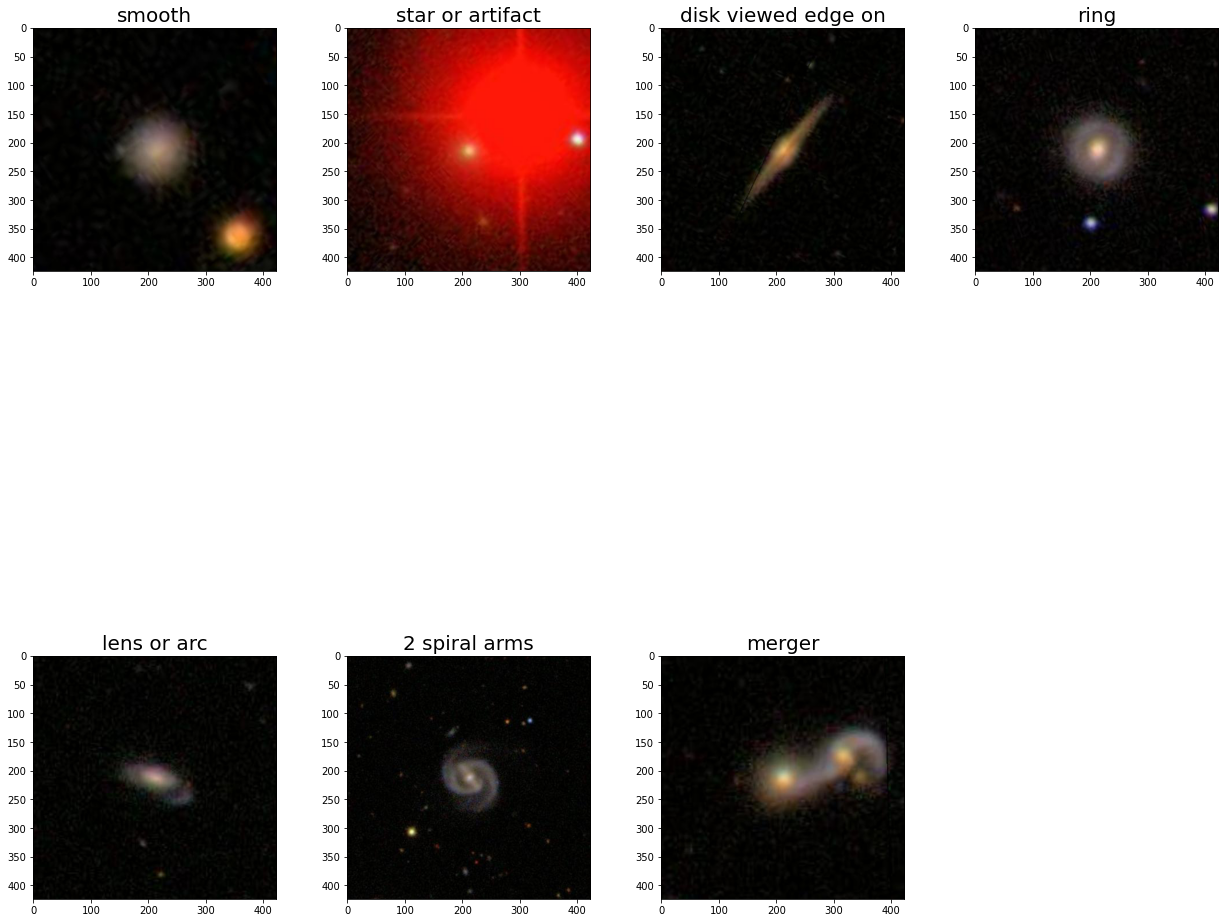

In [59]:
label_interests = [0,2,3,18,19,32,23]

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 18)
fig.tight_layout(pad=4.0)

k=0
for i in range(2):
    for j in range(4):
        try:

          index = np.argmax(true_labels[:,label_interests[k]])
          galaxy_id = str(galaxyids_test[index])
          file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
          img = mpimg.imread(file_name)
          axs[i,j].imshow(img)
          axs[i,j].set_title(classes[label_interests[k]], size = 20)

          k += 1
        except:
            print('buh')

axs[1,3].remove()


## Problem 25 (Predicted Merger threshold)

354
buh
buh
buh
buh
buh
buh
buh
buh
buh


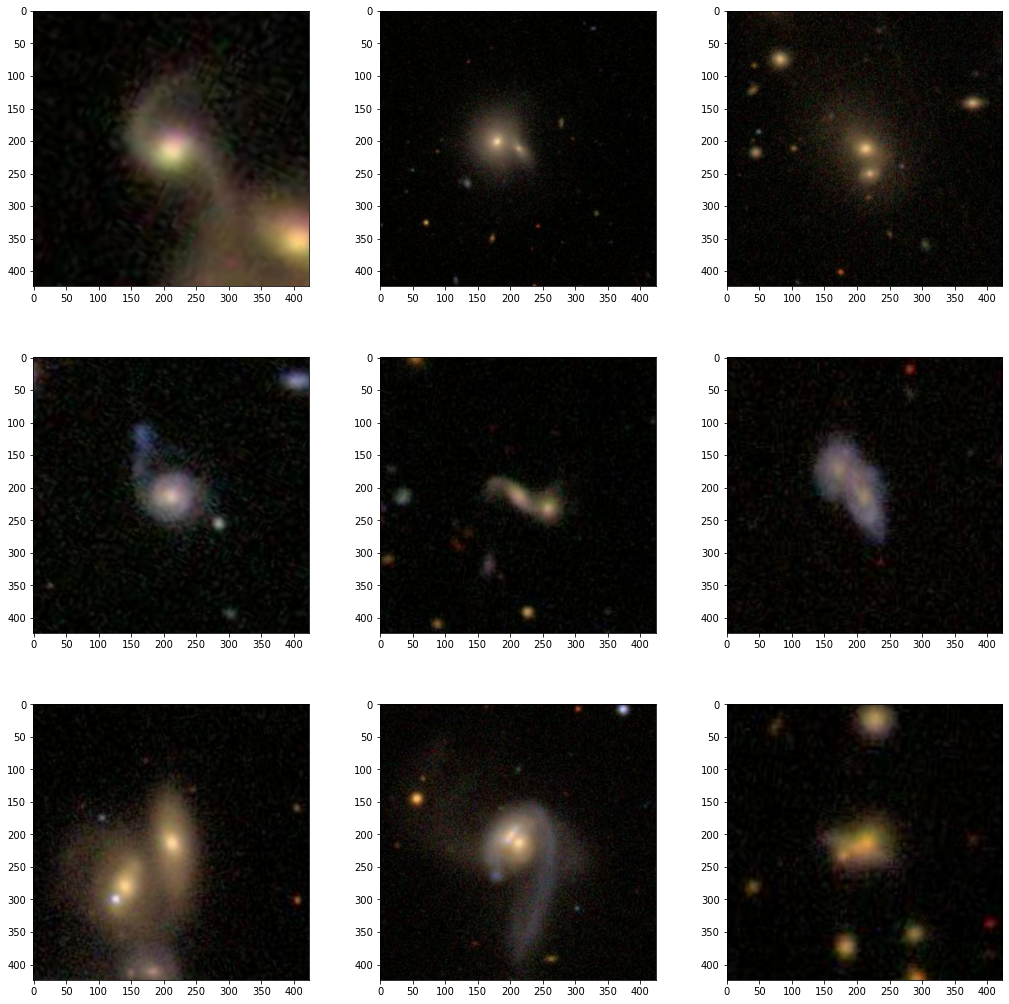

In [60]:
merger_indices = []
for i in range(len(galaxyids_test)):
  prob = predicted_labels[i,23]
  if(prob >= 0.3):
    merger_indices.append(i)

print(len(merger_indices))

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
fig.tight_layout(pad=4.0)
for i in range(3):
    for j in range(3):
        try:
          index = random.choice(merger_indices)
          galaxy_id = str(galaxyids_test[index])
          file_name = '/content/training_images/training_images/' + galaxy_id + '.jpg'
          img = mpimg.imread(file_name)
          axs[i,j].imshow(img)
          axs[i,j].set_title(classes[label_interests[k]], size = 12)

        except:
            print('buh')


## Problem 26 (estimate merger-rate on testing set)

In [61]:
from os import listdir
from os.path import isfile, join

test_image_files = os.listdir('/content/test_images/test_images')
print(len(test_image_files))

def downsize_image(test_image_file):
    file_name = '/content/test_images/test_images/'+str(test_image_file)
    img1_d = np.array(cv2.imread(file_name)[90:334, 90:334])
    img1_d = np.array(cv2.resize(img1_d, (0, 0), fx = 0.28, fy = 0.28))
    
    return img1_d


test_images_files_2 = []

for file in test_image_files:
  if '._' not in file:
    test_images_files_2.append(file)

print(len(test_images_files_2))


159950
79975


In [62]:
test_imgs = []
for file_name in test_images_files_2:
  
  img = downsize_image(file_name)
  test_imgs.append(img)

In [63]:
np.shape(test_imgs)

(79975, 68, 68, 3)

In [64]:
test_predicted_labels = resnet_model_1.predict(np.array(test_imgs))
print(np.shape(test_predicted_labels))

2500/2500 [==============================] - 44s 18ms/step
(79975, 37)


2324
buh
buh
buh
buh
buh
buh
buh
buh
buh


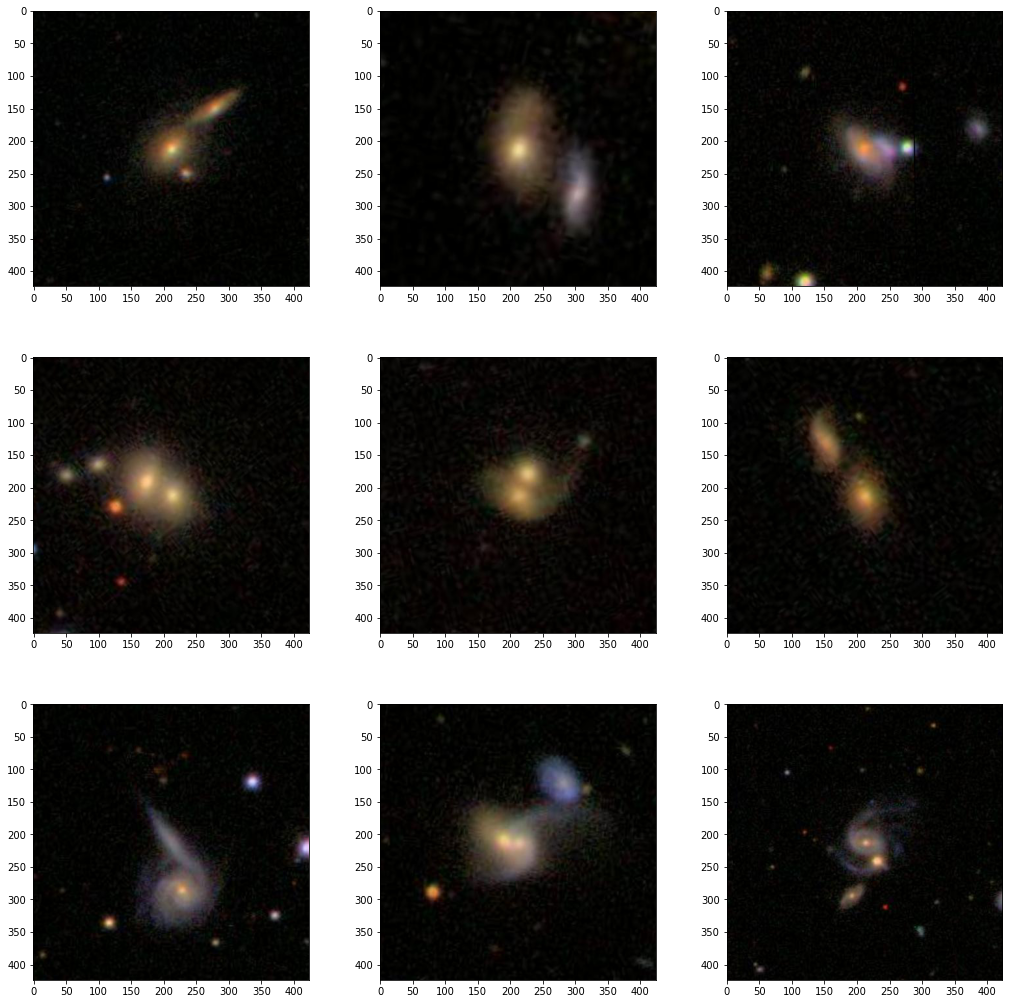

In [75]:
merger_indices = []
for i in range(len(test_images_files_2)):
  prob = test_predicted_labels[i,23]
  if(prob >= 0.28):
    merger_indices.append(i)

print(len(merger_indices))

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
fig.tight_layout(pad=4.0)
for i in range(3):
    for j in range(3):
        try:
          index = random.choice(merger_indices)
          id = str(test_images_files_2[index])
          file_name = '/content/test_images/test_images/'+id
          img = mpimg.imread(file_name)
          axs[i,j].imshow(img)
          axs[i,j].set_title(classes[label_interests[k]], size = 12)

        except:
            print('buh')


In [66]:
#merger fraction

print('merger fraction at z = 0:', len(merger_indices)/len(test_images_files_2))

merger fraction at z = 0: 0.029059080962800875
